In [10]:
import pandas as pd
import numpy as np

In [13]:
import pandas as pd
encodings = [ 'utf -8', 'latin1', 'ISO- 8859-1', 'cp1252']
file_path = 'spam.csv'
for encoding in encodings:
   try :
    df = pd.read_csv(file_path, encoding=encoding)
    print(f"File sucessfully read with encoding: {encoding}")
    break
   except UnicodeDecodeError:
    print(f"Failed to read with encoding: {encoding}")
    continue
if 'df' in locals():
  print("CSV file has been sucesfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

Failed to read with encoding: utf -8
File sucessfully read with encoding: latin1
CSV file has been sucesfully loaded.


In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2344,ham,Okie...,NaN,NaN,NaN
3400,ham,Thanks honey. Have a great day.,NaN,NaN,NaN
463,ham,"Sorry, I'll call later ok bye",NaN,NaN,NaN
905,ham,Hey what's up charles sorry about the late reply.,NaN,NaN,NaN
2340,ham,I will take care of financial problem.i will h...,NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
df.drop(columns= [ 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [19]:
df.sample(5)

,v1,v2,Unnamed: 2
4496,ham,Ok,NaN
1753,ham,Jus came back fr lunch wif my sis only. U leh?,NaN
3319,ham,Eh sorry leh... I din c ur msg. Not sad alread...,NaN
1653,ham,I was at bugis juz now wat... But now i'm walk...,NaN
1301,ham,I tot u reach liao. He said t-shirt.,NaN


In [21]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2
1714,ham,Yeah I don't see why not,NaN
2812,ham,Enjoy the showers of possessiveness poured on ...,NaN
5094,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",NaN
3862,spam,Oh my god! I've found your number again! I'm s...,NaN
1858,ham,"Sir, i am waiting for your call.",NaN


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df['target'] = encoder.fit_transform(df['target'])

In [24]:
df.head()

,target,text,Unnamed: 2
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN


In [25]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
dtype: int64

In [26]:
df.duplicated().sum()

403

In [27]:
df = df.drop_duplicates(keep= 'first')

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 3)

In [30]:
df.head()

,target,text,Unnamed: 2
0,0,"Go until jurong point, crazy.. Available only ...",NaN
1,0,Ok lar... Joking wif u oni...,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,0,U dun say so early hor... U c already then say...,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN


In [31]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

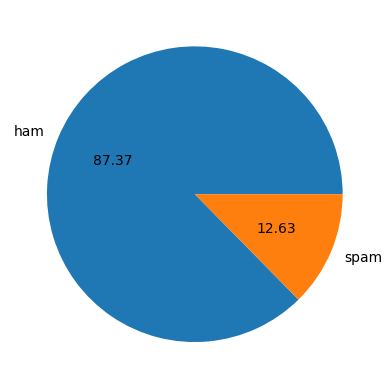

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [33]:
import nltk

In [34]:
!pip install nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
df['num_characters'] = df['text'].apply(len)

In [37]:
df.head()

,target,text,Unnamed: 2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61


In [38]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [39]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15


In [40]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1


In [42]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[df['target'] == 0 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

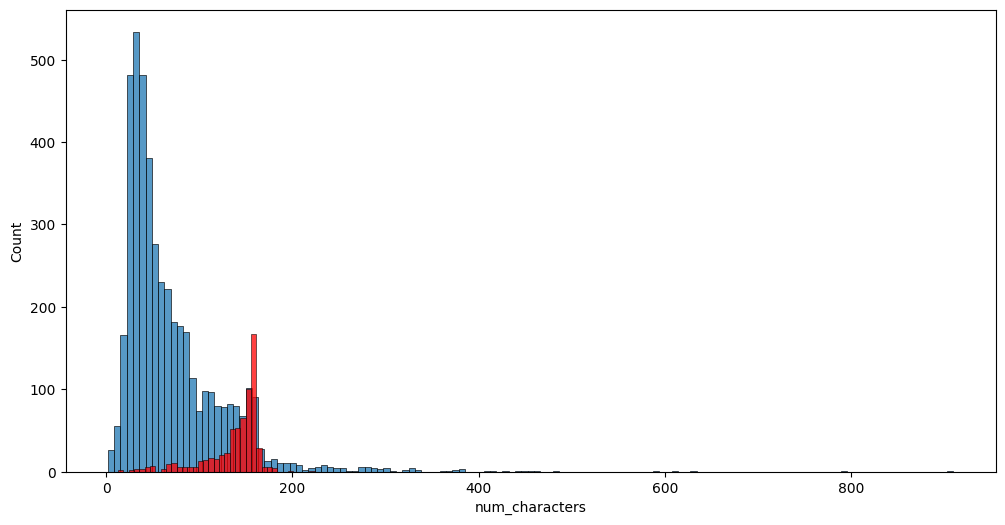

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['num_characters'])
sns.histplot(df[df['target'] == 1] ['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

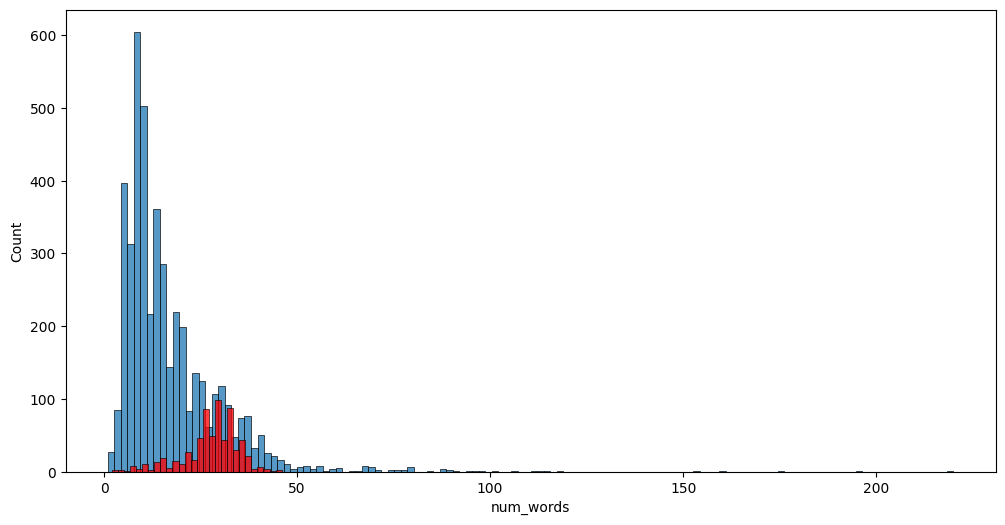

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'], color='red')

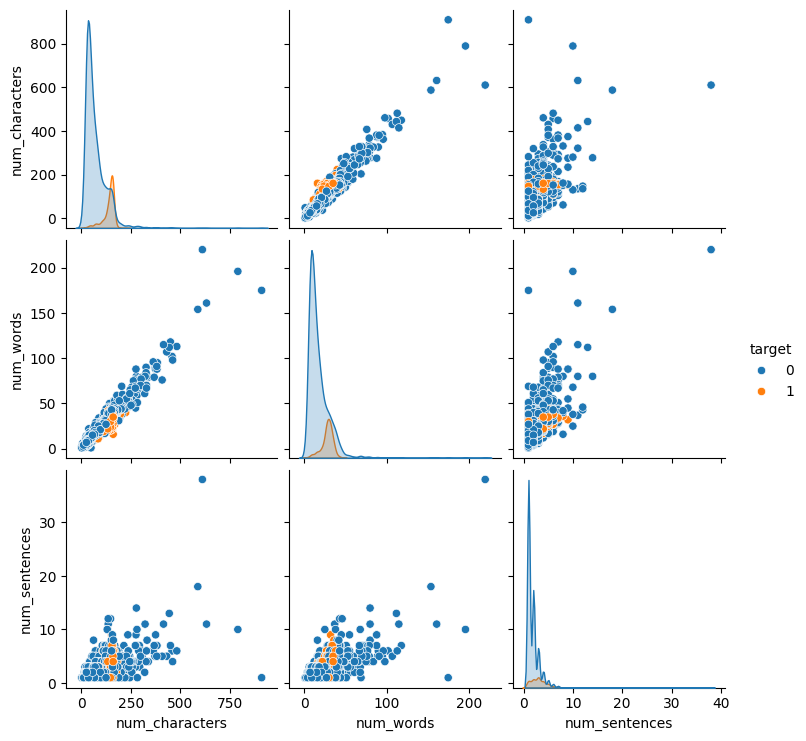

In [47]:
sns.pairplot(df,hue='target')

<ipython-input-48-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

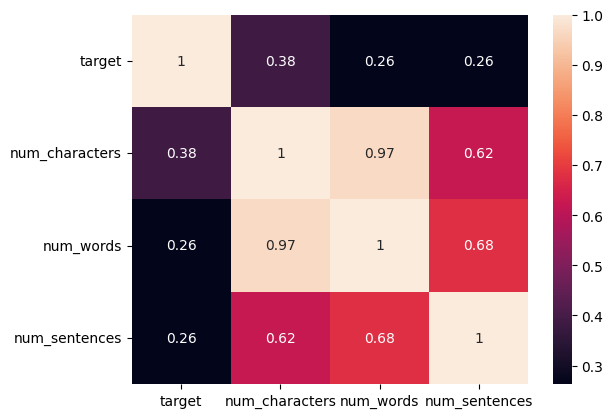

In [48]:
sns.heatmap(df.corr(), annot=True)

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps = PorterStemmer()
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)
transformed_text = transform_text("I'm gonna be home soon and i don't want to talk")
print(transformed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...


gon na home soon want talk


[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
df['text'] [10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [57]:
df['transformed_text'] = df['text'].apply(transform_text)

In [58]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [59]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [60]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

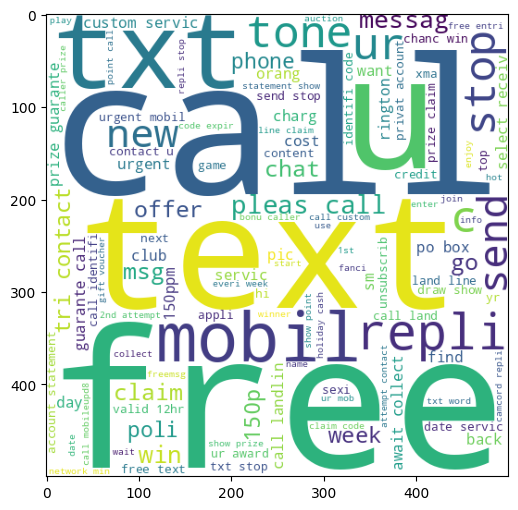

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [62]:
ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

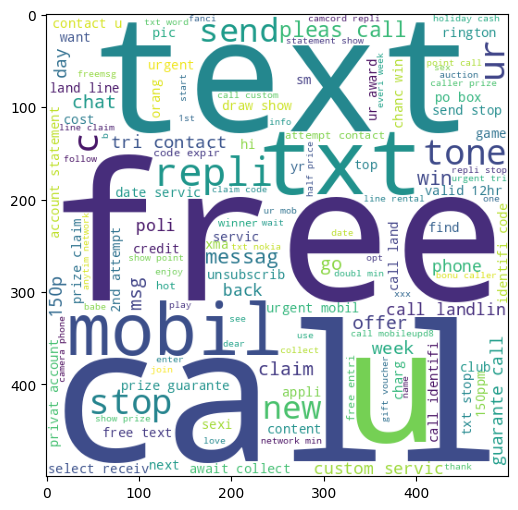

In [63]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [64]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [65]:
spam_corpus = []
for msg in df[df ['target'] == 1]['transformed_text'].tolist():
 for word in msg.split():
  spam_corpus.append(word)

In [66]:
len(spam_corpus)

9939

In [70]:
ham_corpus = []
for msg in df[df ['target'] == 1]['transformed_text'].tolist():
 for word in msg.split():
  ham_corpus.append(word)

In [71]:
len(ham_corpus)

9939

In [72]:
df.head()

,target,text,Unnamed: 2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [74]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf  = TfidfVectorizer(max_features=3000)

In [75]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [76]:
x.shape

(5169, 3000)

In [77]:
y = df['target'].values


ImportError: cannot import name 'train_tets_split' from 'sklearn.model_selection' (/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/__init__.py)